In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords 
from collections import Counter
import os

C:\Users\Ming Xuan\AppData\Local\Temp\ipykernel_29144\2238641776.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_data(files):

    data_path = os.getcwd()+'/Data/'
    combined_df = pd.DataFrame(columns=['text', 'label'])
    df_columns = ['text', 'label']
    
    for x in files:

        df = pd.read_csv(data_path+x)
        df = df[df.columns[:2]]
        df.columns = df_columns
        df['text'] = df['text'].astype(str)

        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

In [4]:
files = ['dataset1.csv']#, 'dataset2.csv', 'dataset3.csv', 'dataset4.csv']#, 'dataset5.csv']

data_df = get_data(files)
data_df

C:\Users\Ming Xuan\AppData\Local\Temp\ipykernel_29144\622898227.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, df], ignore_index=True)


,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0
...,...,...
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0


In [5]:
data_df['label'].value_counts()

label
0.0    6247
1.0     733
Name: count, dtype: int64

# Non-Depressive

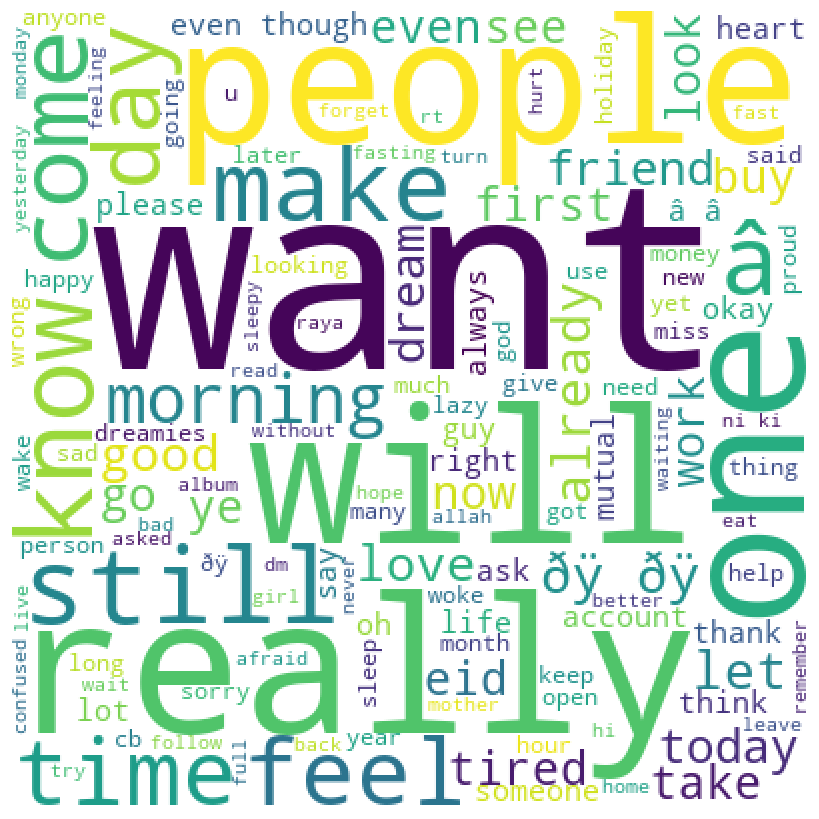

In [11]:
from wordcloud import WordCloud, STOPWORDS

non_depressive_df = data_df[data_df['label'] == 0]

comment_words = ''
stopwords = set(STOPWORDS)

for val in non_depressive_df['text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Depressive

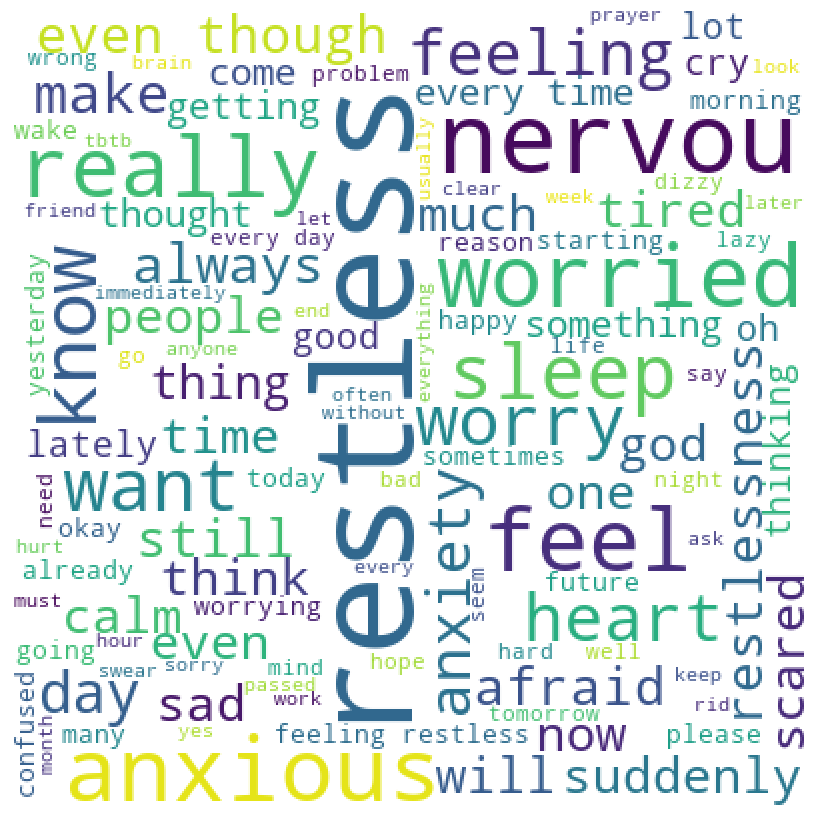

In [12]:
depressive_df = data_df[data_df['label'] == 1]

comment_words = ''
stopwords = set(STOPWORDS)

for val in depressive_df['text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()